http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_morphology.html
Note that morphology functions only work on gray-scale or binary images
if image is in black
Dilation - grow image regions [set pixel to max (white) within a box]
Erosion - shrink image regions [set pixel to min (black) within a box]
Opening - structured removal of image region boundary pixels [an erosion followed by a dilation, remove white dots]
Closing - structured filling in of image region boundary pixels [as a dilation followed by an erosion, remove black dots]

pyenv shell sa_env
pip install imagecodecs

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
https://scikit-learn.org/stable/modules/clustering.html
Very large n_samples

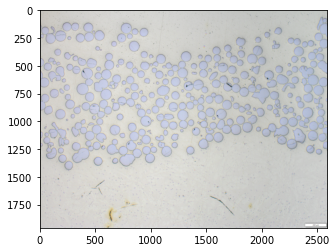

In [488]:
from skimage import io
from skimage.viewer import ImageViewer
import numpy as np
import numpy.linalg as la
from skimage import filters
from skimage import feature
import skimage
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.cluster import KMeans

Xref = io.imread('20-1.tif')
plt.imshow(Xref)
plt.show()

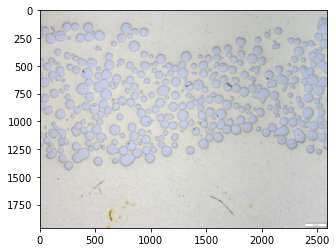

In [489]:
# X = cv.GaussianBlur(Xref,(3,3),1,sigmaY=1)
# X = cv.blur(Xref,(9,9),0)
# X = cv.medianBlur(Xref,9)
X = cv.bilateralFilter(Xref,9,255,255)
plt.imshow(X)


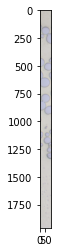

In [490]:
slice = 100
Xslice = X[:, :slice,:].reshape(-1, 3)
plt.imshow(Xslice.reshape(-1, slice, 3))
n = Xslice.shape[0]

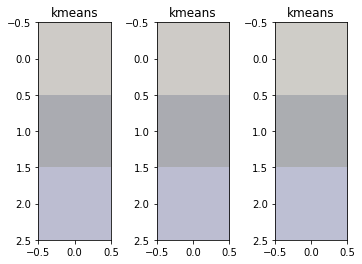

In [491]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0,algorithm='auto',n_init=20,max_iter=500,tol=1e-5).fit(Xslice)
centers_size=np.empty((n_clusters))
centers_mean=np.empty((n_clusters,3))
centers_median=np.empty((n_clusters,3))
centers = kmeans.cluster_centers_
labels = kmeans.labels_
for i in range(n_clusters):
    centers_mean[i] = np.mean(Xslice[labels==i],axis=0)
    centers_median[i] = np.median(Xslice[labels==i],axis=0)
    centers_size[i] = np.sum(labels==i)
plt.subplot(1, 3, 1)
plt.imshow(centers.reshape(-1,1,3).astype(np.int))
plt.title('kmeans')
plt.subplot(1, 3, 2)
plt.imshow(centers_mean.reshape(-1,1,3).astype(np.int))
plt.title('kmeans')
plt.subplot(1, 3, 3)
plt.imshow(centers_median.reshape(-1,1,3).astype(np.int))
plt.title('kmeans')
plt.show()


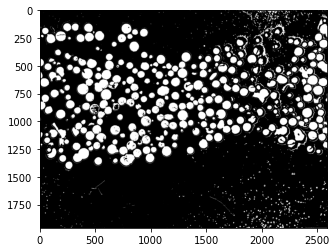

In [492]:
# background = np.argmax(centers_size / n)
# np.nonzero(centers_size / n > .3)[0][0]

image = np.copy(X).reshape(-1,3)
labels = kmeans.predict(image)
idx = labels == 2
image[idx] = [255, 255, 255]
image[~idx] = [0, 0, 0]
plt.imshow(image.reshape(X.shape))
plt.show()
#

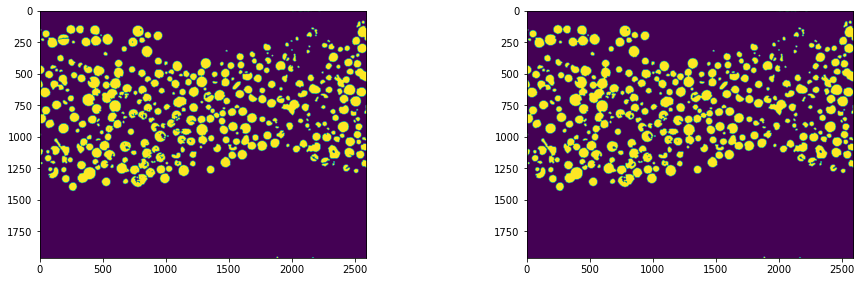

In [507]:
binary_image = np.mean(image.reshape(X.shape), axis=2)
binary_image[binary_image>0]=1

# gray = cv.cvtColor(image.reshape(X.shape),cv.COLOR_RGB2GRAY)
#
# thresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY_INV,5,30)
# plt.imshow(thresh)

# kernel = np.ones((3, 3), np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
image_opening = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel, iterations=2)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
image_closing = cv.morphologyEx(image_opening, cv.MORPH_CLOSE, kernel, iterations=3)

plt.figure(figsize=[16,10])
plt.subplot(2,2,1)
plt.imshow(image_opening)
plt.subplot(2,2,2)
plt.imshow(image_closing)
plt.show()



# TODO: https://aishack.in/tutorials/connected-component-labelling/
# TODO: https://aishack.in/tutorials/circle-hough-transform/
# TODO: similarity measure for each cluser -> smooth the outcome -> update clusters

# cracks may be isolated using the contour function on the isolated particles

# stress statistics
# max eq residual stress or max normal stress ...